### Introduction :
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

### Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

### Data :
train.csv and test.csv was provided by kaggle.

### Project Goals :
The objective of this challenge is to use our knowledge of machine learning and data science to predict house prices.

### Data :
In this project, we will use the train.csv data to form the model and test.csv to test our model.
Each column in the dataset represents a characteristic and each row is a sample.

### Analysis : 
In this project we will use our knowledge of descriptive statistics and data visualisation to summarise the data. As we have to make a prediction, we will use regression algorithms typical of supervised learning.
We will use cross-validation to check the generalizability of our models, grid search to tune the parameters of the best model
Since our variables are numerous, we will use principal component analysis (PCA) to visualize the data.

### Evaluation :
We will use test data for evaluation and the r2 score as a metric for our evaluation on test data.

### Import of modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Collecting the data 

In [20]:
#Train Data
train_data = pd.read_csv("train.csv")
id_train_data = train_data["Id"]
train_data = train_data.drop("Id",axis = 1)
y = train_data.loc[:,"SalePrice"]

In [9]:
#Examine the structure of the data

In [10]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
#Data description

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### You can have a more complete description of our variables in the file data_description.txt .

In [13]:
categorical_features = train_data.select_dtypes(include="object").columns
numeric_features = train_data.select_dtypes(exclude="object").columns

In [14]:
#Statistical summary of numerical variables.
train_data[numeric_features].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
#Summary of categorical variables
for col in categorical_features:
    print(f"Variable  {col} : ")
    print(train_data[col].value_counts())
    print()
    print()


Variable  MSZoning : 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Variable  Street : 
Pave    1454
Grvl       6
Name: Street, dtype: int64


Variable  Alley : 
Grvl    50
Pave    41
Name: Alley, dtype: int64


Variable  LotShape : 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Variable  LandContour : 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Variable  Utilities : 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Variable  LotConfig : 
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Variable  LandSlope : 
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Variable  Neighborhood : 
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mi

### Creation of the test set

In [19]:
test_data = pd.read_csv("test.csv")
id_test_data = test_data["Id"]
test_data = test_data.drop("Id",axis = 1)
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Data exploration

#### It is difficult to use the traditional method to visualize a data set with many dimensions. That is why we will use PCA for our visualization.

In [21]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector

In [53]:
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

numeric_features =['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

# Scale numeric values
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# One-hot encode categorical values
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, selector(dtype_include='float64')),
        ('cat', cat_transformer, selector(dtype_include='category'))])
train_data = train_data.drop("SalePrice", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2,
                                                    random_state=0)

In [54]:
housing_scared = preprocessor.fit_transform(X_train)
housing_pca = PCA(n_components=3)
components = housing_pca.fit_transform(housing_scared)
#components = pd.DataFrame(components).transpose()
var_ratio = housing_pca.explained_variance_ratio_
print(var_ratio)
housing_pcomp = pd.DataFrame(components)
housing_pcomp = housing_pcomp.iloc[:,:]
housing_pcomp.columns = ['Comp1', 'Comp2','Comp3']
print(housing_pcomp.head())

[0.44006144 0.3148389  0.24509966]
      Comp1     Comp2     Comp3
0  2.427752  0.046970  0.399610
1 -0.979238  0.003048  0.124365
2 -1.576714  1.681734  0.908329
3  0.745894 -0.541808 -0.420741
4  1.756796  1.502401 -1.035206


In [55]:
housing_pcomp["SalePrice"] = y[:len(housing_pcomp)]
#finalDf = pd.concat([housing_pcomp, , axis = 1)
housing_pcomp

,Comp1,Comp2,Comp3,SalePrice
0,2.427752,0.046970,0.399610,208500
1,-0.979238,0.003048,0.124365,181500
2,-1.576714,1.681734,0.908329,223500
3,0.745894,-0.541808,-0.420741,140000
4,1.756796,1.502401,-1.035206,250000
...,...,...,...,...
1163,2.873462,-0.244450,1.601259,108959
1164,-0.135692,-0.703762,-0.745119,194000
1165,-0.414379,0.000974,-0.390617,233170
1166,0.293005,-0.487781,-0.970579,245350


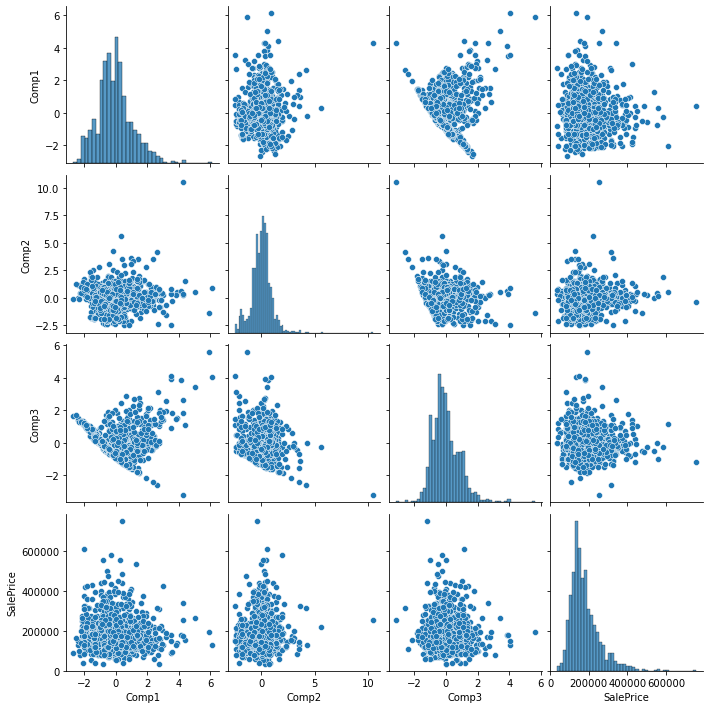

In [56]:
#Data visualization
sns.pairplot(housing_pcomp)

#### Computation of the Pearson coefficient, to determine how our components behave with our target variable.

In [57]:
corr = housing_pcomp.corr()
corr["SalePrice"].sort_values(ascending = False)

SalePrice    1.000000
Comp2        0.063848
Comp3       -0.021595
Comp1       -0.026943
Name: SalePrice, dtype: float64

### MODEL SELECTION AND TRAINING

#### In the exploration phase, we cleaned and prepared the data. So we will move on to the choices of supervised learning algorithms for the regression.

In [58]:
housing_scared = housing_scared
y_train = y_train
X_test = preprocessor.transform(X_test)

In [59]:
housing_scared.shape

(1168, 3)

In [60]:
y_train.shape

(1168,)

The models we will use are :

K-nearest-neighbour

Linear models:

    1.linear regression
    2.ridge regression
    
Decision trees

Random forests

Regression tree boosting



In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### K-nearest-neighbours

In [135]:
knn = KNeighborsRegressor()
knn.fit(housing_scared, y_train)

KNeighborsRegressor()

In [137]:
print(f"Scores on training data : {knn.score(housing_scared, y_train)}")
print(f"Scores on test data : {knn.score(X_test, y_test)}")

Scores on training data : 0.6518108834178383
Scores on test data : 0.4327671020933703


#### Linear regression

In [62]:
linear_regression = LinearRegression()
linear_regression.fit(housing_scared, y_train)

LinearRegression()

In [122]:
print(f"Score on training data : {linear_regression.score(housing_scared, y_train)}")
print(f"Score on test data : {linear_regression.score(X_test, y_test)}")

Score on training data : 0.4398744688194869
Score on test data : 0.33072894974811473


#### Ridge regression

In [85]:
ridge_regression = Ridge(alpha = 1.0)
ridge_regression.fit(housing_scared, y_train)

Ridge()

In [124]:
print(f"Score on training data : {ridge_regression.score(housing_scared, y_train)}")
print(f"Score on test data : {ridge_regression.score(X_test, y_test)}")

Score on training data : 0.4398742829230825
Score on test data : 0.33079608484726997


#### Decision trees

In [138]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(housing_scared, y_train)

DecisionTreeRegressor()

In [139]:
print(f"Best score on training data : {decision_tree.score(housing_scared, y_train)}")
print(f"Best score on test data : {decision_tree.score(X_test, y_test)}")

Best score on training data : 0.9528251413219404
Best score on test data : 0.08196370243384676


#### Random forests

In [140]:
random_forest = RandomForestRegressor(random_state = 42)
random_forest.fit(housing_scared, y_train)

RandomForestRegressor(random_state=42)

In [141]:
print(f"Best score on training data : {random_forest.score(housing_scared, y_train)}")
print(f"Best score on test data : {random_forest.score(X_test, y_test)}")

Best score on training data : 0.8946439672831511
Best score on test data : 0.4063360084168356


### Regression Tree Boosting

In [142]:
regression_tree_boosting = GradientBoostingRegressor(random_state = 42)
regression_tree_boosting.fit(housing_scared, y_train)

GradientBoostingRegressor(random_state=42)

In [143]:
print(f"Best score on training data : {regression_tree_boosting.score(housing_scared, y_train)}")
print(f"Best score on test data : {regression_tree_boosting.score(X_test, y_test)}")

Best score on training data : 0.7216563014571216
Best score on test data : 0.4421830391162259


### Let us now see how these algorithms generalize with cross-validation.


In [105]:
from sklearn.model_selection import cross_val_score

#### Regression tree boosting

In [146]:
scores = cross_val_score(regression_tree_boosting, housing_scared, y_train, cv=10)

In [147]:
scores.mean()

0.5158890676660929

#### Random Forests

In [148]:
scores = cross_val_score(random_forest, housing_scared, y_train, cv=10)

In [149]:
scores.mean()

0.4808087959158532

#### With cross-validation, we notice that the boosting regression tree is the model that generalizes the most. So we will use the grid search to refine its parameters.

In [150]:
from sklearn.model_selection import GridSearchCV

In [152]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : list(range(1,6))
                 }

In [153]:
grid_GBR = GridSearchCV(regression_tree_boosting, param_grid = parameters, cv = 5)
grid_GBR.fit(housing_scared, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [154]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=4, random_state=42,
                          subsample=0.9)

 The best score across ALL searched params:
 0.5201662511767082

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [155]:
final_model = grid_GBR.best_estimator_

In [156]:
print(f"Final score on test data : {final_model.score(X_test, y_test)}")

Final score on test data : 0.4395299936860212


In [ ]:
test_data = 